In [5]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
# import matplotlib.pyplot as plt
import pandas as pd

import pathlib 

site=24
parent_path = pathlib.Path(os.getcwd()).parent
file_path = parent_path / "output" / "xi_0.5" /  f"sitenum_{site}" / "model_full_model_v3" / "pf_25.0" / "pa_41.945" / "weight_0.25" / "timehzn_200" / "results.pcl"


with open(file_path, 'rb') as f:
    # Load the data from the file
    results = pickle.load(f)


In [6]:
z_hmc=results['sol_val_Z_tracker'][-1][:,:50]
df_ori = pd.read_csv(parent_path/"data"/"hmc"/"hmc_24SitesModel.csv")

## Sum the z dot and add it to the z_2017
site_z_0 = df_ori.iloc[:, 1].to_numpy()
site_z_0_reshaped = site_z_0.reshape(site, 1)
site_z_bar=df_ori.iloc[:,2].to_numpy()
cumulative_hmc_z = (np.cumsum(z_hmc, axis=1)+site_z_0_reshaped/1e9)

## load deterministic z solved

z_det=results['sol_val_Z_tracker'][0][:,:50]
cumulative_det_z = (np.cumsum(z_det, axis=1)+site_z_0_reshaped/1e9)

## add t=0 for hmc solution
cumulative_hmc_z = np.hstack((site_z_0_reshaped/1e9, cumulative_hmc_z))
cumulative_det_z = np.hstack((site_z_0_reshaped/1e9, cumulative_det_z))


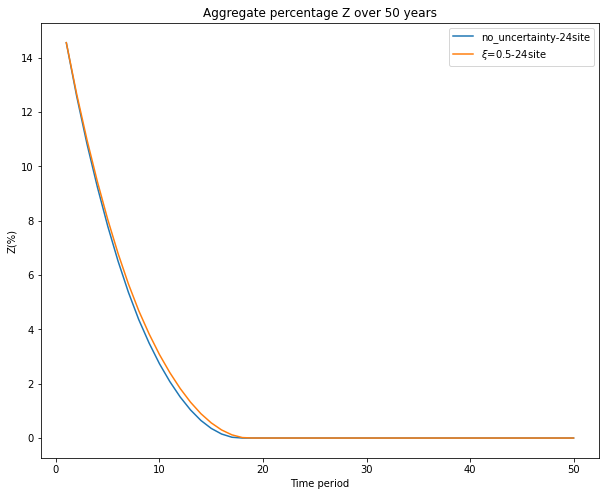

In [7]:
percentage_z_hmc=np.sum(cumulative_hmc_z,axis=0)/(np.sum(site_z_bar)/1e9)*100
percentage_z_det=np.sum(cumulative_det_z,axis=0)/(np.sum(site_z_bar)/1e9)*100
time = np.arange(1, 51)  


fig, axes = plt.subplots(1, 1, figsize = (10,8))

plt.plot(time, percentage_z_det[:50], label="no_uncertainty-24site")
plt.plot(time, percentage_z_hmc[:50], label=r'$\xi$=0.5-24site')



plt.xlabel('Time period')
plt.ylabel('Z(%)')
plt.title('Aggregate percentage Z over 50 years')
plt.grid(False)

# Display the legend
plt.legend()
fig.savefig("aggregate_percentage_Z.png", dpi=300)

plt.show()

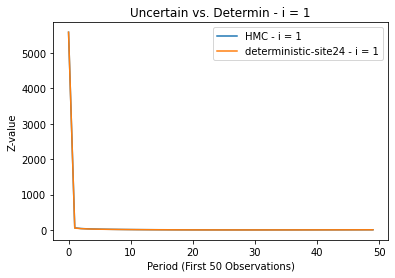

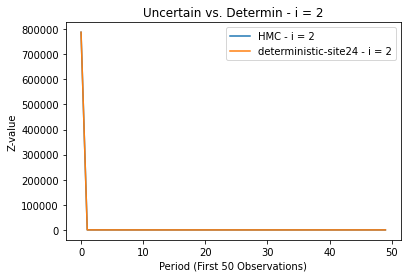

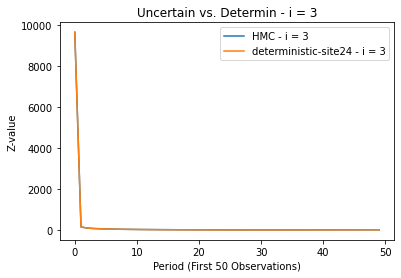

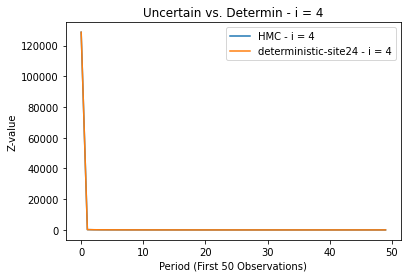

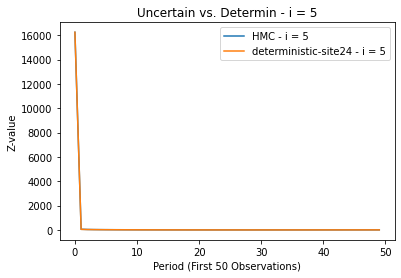

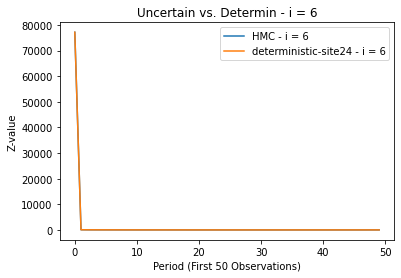

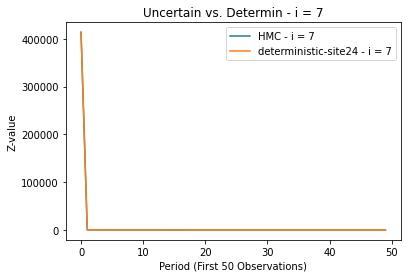

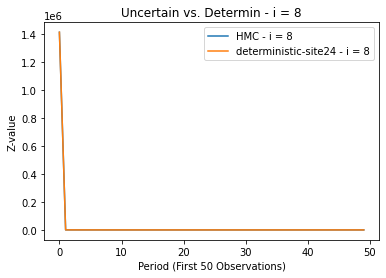

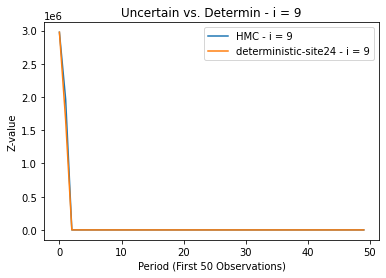

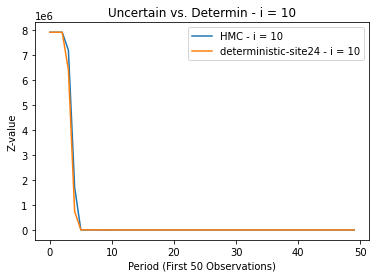

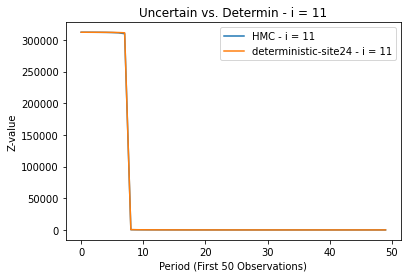

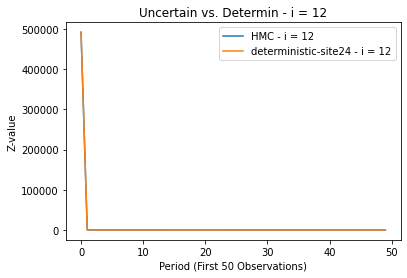

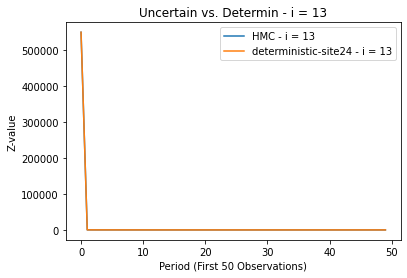

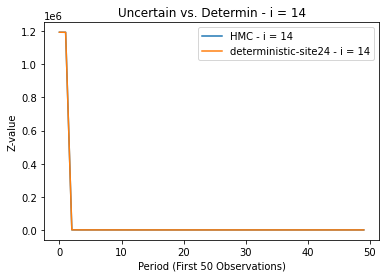

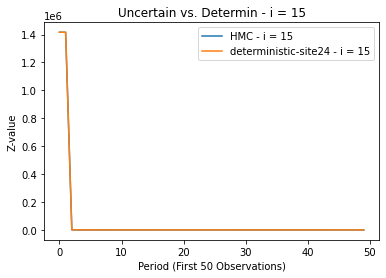

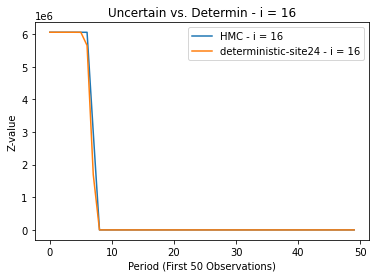

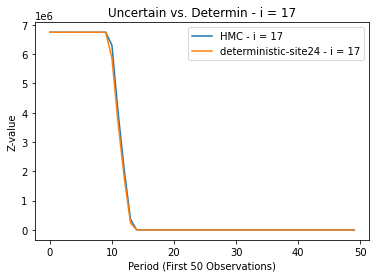

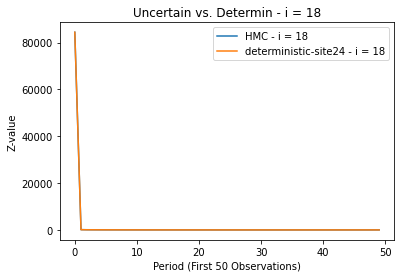

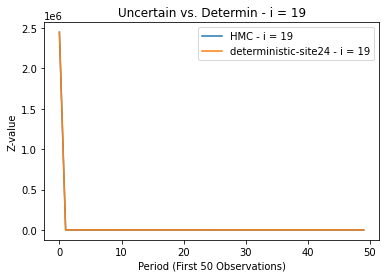

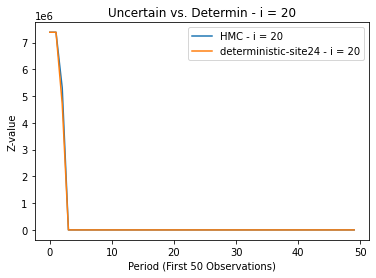

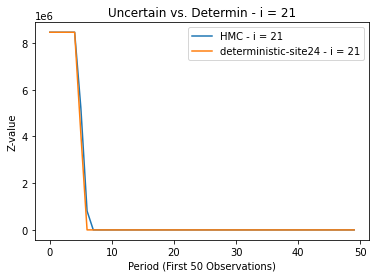

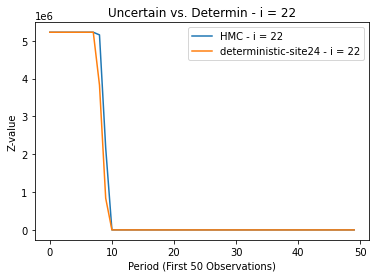

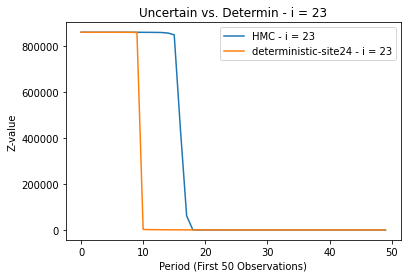

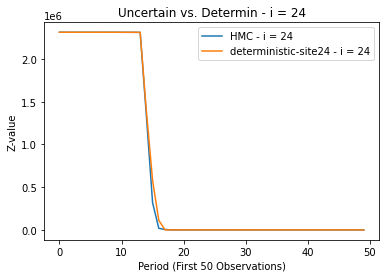

In [8]:
for i in range(site):
    fig, ax = plt.subplots()
    ax.plot(range(50), cumulative_hmc_z[i,:50]*1e9, label=f'HMC - i = {i+1}')
    ax.plot(range(50), cumulative_det_z[i,:50]*1e9, label=f'deterministic-site24 - i = {i+1}')
    ax.set_xlabel('Period (First 50 Observations)')
    ax.set_ylabel('Z-value')
    ax.set_title(f'Uncertain vs. Determin - i = {i+1}')
    ax.legend()
    plt.show()

